# Data Exploration - this is updated 2:14PM

## 1. Importing data into DataFrames

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_mojo_gross = pd.read_csv('bom.movie_gross.csv.gz')
df_imdb_name_basics = pd.read_csv('imdb.name.basics.csv.gz')
df_imdb_title = pd.read_csv('imdb.title.akas.csv.gz')
df_imdb_basics = pd.read_csv('imdb.title.basics.csv.gz')
df_imdb_title_crew = pd.read_csv('imdb.title.crew.csv.gz')
df_imdb_title_principals = pd.read_csv('imdb.title.principals.csv.gz')
df_imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
df_rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
df_tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

In [3]:
list_of_data = [df_mojo_gross, df_imdb_name_basics, df_imdb_title, df_imdb_basics, df_imdb_title_crew,
               df_imdb_title_principals, df_imdb_title_ratings, df_rt_movie_info, df_rt_reviews, df_tmdb_movies, 
                df_tn_movie_budgets]

## 2. Previewing DataFrames

In [4]:
for df in list_of_data:
    display(df.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
for df in list_of_data:
    display(df.shape)

(3387, 5)

(606648, 6)

(331703, 8)

(146144, 6)

(146144, 3)

(1028186, 6)

(73856, 3)

(1560, 12)

(54432, 8)

(26517, 10)

(5782, 6)

## 3. Visualizing DataFrames

In [6]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Converting production_budget, domestic_gross and worldwide_gross from strings into floats:

In [7]:
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets.production_budget.str.replace('$', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].str.replace(',', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].astype(float)

df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets.domestic_gross.str.replace('$', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].astype(float)

df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets.worldwide_gross.str.replace('$', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].astype(float)

df_tn_movie_budgets.head()

id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  production_budget_edited  \
0      $425,000,000   $760,507,625  $2,776,345,279               425000000.0   
1      $410,600,000   $241,063,875  $1,045,663,875               410600000.0   
2      $350,000,000    $42,762,350    $149,762,350               350000000.0   
3      $330,600,000   $459,005,868  $1,403,013,963               330600000.0   
4      $317,000,000   $620,181,382  $1,316,721,747               317000000.0   

   domestic_gross_edited  worldwide_gross_edited       ROI  \
0            760507625.0            2.776345e+09  6.532577   
1            241063875.0            1.045664e+09  2.546673   
2             42762350.0            1.497624e+08  0.427892   
3            459005868.0            1.403014e+09  4.243841   
4            620181382.0            1.316722e+09  4.153696   

  production_budget_edited ($M) production_budget_edited_$M  
0                   425,000,000                 425,000,000  
1                   410,600,000                 410,600,000  
2                   350,000,000                 350,000,000  
3                   330,600,000                 330,600,000  
4                   317,000,000                 317,000,000

Making the basis in $M.

In [8]:
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'] / 1000000
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'] / 1000000
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'] / 1000000

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747


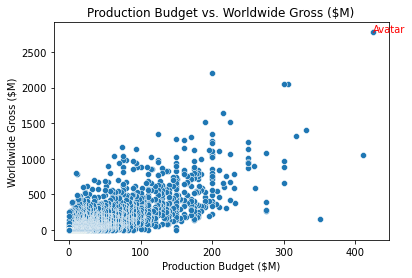

In [9]:
ax = sns.scatterplot(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])

ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')

ax.text(df_tn_movie_budgets.production_budget_edited[df_tn_movie_budgets.movie=='Avatar'],
        df_tn_movie_budgets.worldwide_gross_edited[df_tn_movie_budgets.movie=='Avatar'],
         "Avatar", color='red');

Calculating an ROI figure.

In [10]:
df_tn_movie_budgets['ROI'] = df_tn_movie_budgets['worldwide_gross_edited'] / df_tn_movie_budgets['production_budget_edited']

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747,4.153696


In [11]:
df_tn_movie_budgets_ROIaboveX = df_tn_movie_budgets[df_tn_movie_budgets['ROI'] >= 5]

df_tn_movie_budgets_ROIaboveX.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092


Showing movies with ROI > 5

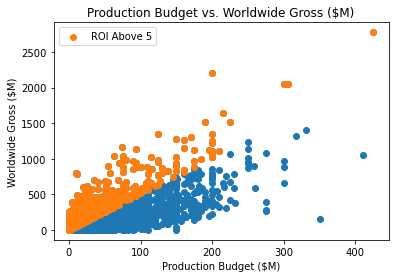

In [12]:
fig, ax = plt.subplots()

ax.scatter(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])
ax.scatter(x=df_tn_movie_budgets_ROIaboveX['production_budget_edited'], 
           y=df_tn_movie_budgets_ROIaboveX['worldwide_gross_edited'], label='ROI Above 5')

ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')
ax.legend(loc='upper left');

In [13]:
df_tn_movie_budgets_ROIaboveX.sort_values('ROI', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
5745,46,"Jun 30, 1972",Deep Throat,"$25,000","$45,000,000","$45,000,000",0.025,45.000000,45.000000,1800.000000
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000",0.200,8.750000,99.750000,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,"$450,000","$107,918,810","$194,183,034",0.450,107.918810,194.183034,431.517853
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",0.100,22.764410,41.656474,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,"$600,000","$140,539,099","$248,300,000",0.600,140.539099,248.300000,413.833333
...,...,...,...,...,...,...,...,...,...,...
4290,91,"Sep 18, 1981",Mommie Dearest,"$5,000,000","$19,032,000","$25,032,000",5.000,19.032000,25.032000,5.006400
3851,52,"Feb 12, 2010",My Name is Khan,"$8,470,000","$4,046,336","$42,355,526",8.470,4.046336,42.355526,5.000652
3176,77,"Dec 20, 1989",Born on the Fourth of July,"$14,000,000","$70,001,698","$70,001,698",14.000,70.001698,70.001698,5.000121
3373,74,"Oct 7, 1960",Spartacus,"$12,000,000","$30,000,000","$60,000,000",12.000,30.000000,60.000000,5.000000


Only interested in relevant movies - post 2009

In [14]:
df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['release_date'].str[-4:]*1
df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['Year'].astype(int)
df_tn_movie_budgets_ROIaboveX.head()

<ipython-input-14-efe7ba5d9c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['release_date'].str[-4:]*1
<ipython-input-14-efe7ba5d9c1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['Year'].astype(int)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577,2009
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114,2018
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382,2012
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092,2015


In [15]:
df_tn_movie_budgets_post2009 = df_tn_movie_budgets_ROIaboveX[df_tn_movie_budgets_ROIaboveX['Year'] >= 2009]
df_tn_movie_budgets_post2009.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577,2009
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114,2018
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382,2012
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092,2015


In [16]:
df_tn_movie_budgets_post2009.shape

(378, 11)

In order to translte the genre_ids into meaningful genre names, we must retrieve the genre key from TMDB:

In [17]:
api_key = "d012e23fce658ca5d5707ca650488781"

import requests

url = 'https://api.themoviedb.org/3/genre/movie/list?api_key={}&language=en-US'.format(api_key)

tmdb_genre = requests.get(url)
print(tmdb_genre)
print(type(tmdb_genre.content))
print(tmdb_genre.text)

<Response [200]>
<class 'bytes'>
{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [18]:
tmdb_genre = tmdb_genre.json()
tmdb_genre

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

Retrieving genre keys from the TMDB api and converting into a python dictionary to be used later to convert genre_id to meaningful labels

In [19]:
tmdb_genre_dict = {}

for x in range(len(tmdb_genre['genres'])):
    entry = {tmdb_genre['genres'][x]['id']: tmdb_genre['genres'][x]['name']}
    tmdb_genre_dict.update(entry)

tmdb_genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

Converting the dictionary keys from int to str to match genre_id

In [20]:
keys_values = tmdb_genre_dict.items()

tmdb_genre_dict = {str(key): str(value) for key, value in keys_values}
tmdb_genre_dict

{'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

In [21]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [22]:
df_tmdb_movies['genre_ids'][0]

'[12, 14, 10751]'

Cleaning genre_id column to parse through in the future 

In [23]:
df_tmdb_movies['genre'] = df_tmdb_movies['genre_ids'].str.strip('[]')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.replace(' ', '')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.split(',')

df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"


In [24]:
# display(df_tn_movie_budgets)
# display(df_tmdb_movies)

# df_tn_movie_budgets.query("movie == 'Harry Potter and the Deathly Hallows: Part 1'")
print('TMDB DF SHAPE:',df_tmdb_movies.shape)
print('TNBUD DF SHAPE:',df_tn_movie_budgets.shape)

TMDB DF SHAPE: (26517, 11)
TNBUD DF SHAPE: (5782, 10)


We had to decide how we want to join our two tables. Our questions are mainly centered around budget so we came to the conclusion that we will only factor movies that we have budget and rating data for. 

In [25]:
df_tn_movie_budgets['release_date'] = pd.to_datetime(df_tn_movie_budgets['release_date'])
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])
tn_tmdb_merged_df = df_tmdb_movies.merge(df_tn_movie_budgets, how='inner', left_on=['original_title','release_date'], 
                                         right_on=['movie','release_date'])
tn_tmdb_merged_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre,id_y,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]",30,How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992",165.00,217.581232,494.870992,2.999218
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]",15,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",170.00,312.433331,621.156389,3.653861
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]",37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]",37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]",38,Inception,"$160,000,000","$292,576,195","$835,524,642",160.00,292.576195,835.524642,5.222029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,24598,"[53, 18, 27]",510284,en,Braid,5.972,2019-02-01,Braid,6.4,18,"[53, 18, 27]",48,Braid,"$1,660,000",$0,"$80,745",1.66,0.000000,0.080745,0.048642
1397,24638,"[18, 10752]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,"[18, 10752]",93,Indivisible,"$2,700,000","$3,511,417","$3,588,305",2.70,3.511417,3.588305,1.329002
1398,24691,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,"[18, 28, 80]",16,El Chicano,"$8,000,000","$700,261","$700,261",8.00,0.700261,0.700261,0.087533
1399,24815,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,"[18, 35, 28, 80]",8,Teefa in Trouble,"$1,500,000",$0,"$98,806",1.50,0.000000,0.098806,0.065871


First, we expanded every element in the list of the cleaned `genre_id`. Then mapped each value based on their keys from the TMDB API Dictionary.

In [26]:
def genreID_coverter(string):
    if string is not None and len(string) > 0:
        return tmdb_genre_dict[string]

In [27]:
df_tmdb_movies_genresplit = pd.DataFrame(tn_tmdb_merged_df['genre'].values.tolist())

for i in range (6):
    df_tmdb_movies_genresplit[i] = df_tmdb_movies_genresplit[i].apply(genreID_coverter)

df_tmdb_movies_genresplit.columns = ['genre1', 'genre2','genre3','genre4','genre5','genre6', 'genre7']

df_tmdb_movies_genresplit

,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,Fantasy,Adventure,Animation,Family,None,None,None
1,Adventure,Action,Science Fiction,None,None,None,None
2,Animation,Comedy,Family,None,None,None,None
3,Animation,Comedy,Family,None,None,None,None
4,Action,Science Fiction,Adventure,None,None,None,None
...,...,...,...,...,...,...,...
1396,Thriller,Drama,Horror,None,None,None,None
1397,Drama,War,None,None,None,None,None
1398,Drama,Action,Crime,None,None,None,None
1399,Drama,Comedy,Action,Crime,None,None,None


In [177]:
df_MAIN = pd.concat([tn_tmdb_merged_df, df_tmdb_movies_genresplit], axis=1)
df_MAIN.drop(columns=['Unnamed: 0', 'id_x', 'genre_ids', 'domestic_gross', 'worldwide_gross','production_budget', 'id_y', 
                     'original_title', 'movie'], inplace=True)


def queryGenre(genreTypeString):
    dataFrameToBeReturned = df_MAIN.query("""
                (genre1 == '{}') or \
                (genre2 == '{}') or \
                (genre3 == '{}') or \
                (genre4 == '{}') or \
                (genre5 == '{}') or \
                (genre6 == '{}') or \
                (genre7 == '{}')
                """.format(genreTypeString,genreTypeString,genreTypeString,genreTypeString,
                           genreTypeString,genreTypeString,genreTypeString))
    return dataFrameToBeReturned

genre_df_dictionary = {}
for key, value in tmdb_genre_dict.items():
    genre_df_dictionary[value] = (queryGenre(value))

genre_df_dictionary['Western']

,original_language,popularity,release_date,title,vote_average,vote_count,genre,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,genre1,genre2,genre3,genre4,genre5,genre6,genre7
29,en,13.467,2010-06-18,Jonah Hex,4.6,708,"[28, 37, 18, 14, 53]",47.0,10.547117,11.022696,0.234525,Action,Western,Drama,Fantasy,Thriller,None,None
30,en,13.118,2010-12-22,True Grit,7.2,2816,"[18, 12, 37]",35.0,171.243005,252.276928,7.207912,Drama,Adventure,Western,None,None,None,None
97,en,8.259,2010-12-03,The Warrior's Way,6.1,203,"[12, 14, 28, 37, 53]",42.0,5.666340,8.514325,0.202722,Adventure,Fantasy,Action,Western,Thriller,None,None
263,en,7.548,2011-10-07,Blackthorn,6.7,111,"[12, 28, 37]",4.5,0.200558,1.217307,0.270513,Adventure,Action,Western,None,None,None,None
307,en,21.260,2012-12-25,Django Unchained,8.0,15725,"[18, 37]",100.0,162.805434,449.948323,4.499483,Drama,Western,None,None,None,None,None
532,en,8.166,2013-08-16,Ain't Them Bodies Saints,6.2,217,"[80, 18, 10749, 37]",5.0,0.391611,1.075009,0.215002,Crime,Drama,Romance,Western,None,None,None
674,en,9.723,2014-09-05,Frontera,6.3,80,"[37, 18]",2.3,0.059696,0.059696,0.025955,Western,Drama,None,None,None,None,None
756,en,20.681,2015-12-25,The Hateful Eight,7.7,8065,"[80, 18, 9648, 37]",62.0,54.117416,147.864886,2.384918,Crime,Drama,Mystery,Western,None,None,None
757,en,20.681,2015-12-25,The Hateful Eight,7.7,8065,"[80, 18, 9648, 37]",62.0,54.117416,147.864886,2.384918,Crime,Drama,Mystery,Western,None,None,None
766,en,19.410,2015-12-25,The Revenant,7.4,11064,"[37, 18, 12]",135.0,183.637894,532.938302,3.947691,Western,Drama,Adventure,None,None,None,None


In [130]:
df_MAIN.corr()

,popularity,vote_average,vote_count,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
popularity,1.000000,0.356600,0.697399,0.624904,0.614627,0.643162,0.060704
vote_average,0.356600,1.000000,0.439686,0.161387,0.313056,0.285002,0.034534
vote_count,0.697399,0.439686,1.000000,0.649334,0.787031,0.791746,0.092189
production_budget_edited,0.624904,0.161387,0.649334,1.000000,0.716894,0.795325,-0.051476
domestic_gross_edited,0.614627,0.313056,0.787031,0.716894,1.000000,0.942977,0.097585
worldwide_gross_edited,0.643162,0.285002,0.791746,0.795325,0.942977,1.000000,0.078247
ROI,0.060704,0.034534,0.092189,-0.051476,0.097585,0.078247,1.000000


In [108]:
df_genre_counts = pd.DataFrame(columns=['genre', 'genre_counts'])

new_dict = {}
for key, value in genre_df_dictionary.items():
    new_dict[key] = len(genre_df_dictionary[key])

value_df_genre_counts = df_genre_counts.append(new_dict, ignore_index=True).T.iloc[2:]

value_df_genre_counts

,0
Action,383
Adventure,274
Animation,96
Comedy,465
Crime,204
Documentary,13
Drama,677
Family,162
Fantasy,157
History,62


In [113]:
value_df_genre_counts.sort_values(by=0, ascending=False)

,0
Drama,677
Comedy,465
Thriller,403
Action,383
Adventure,274
Crime,204
Science Fiction,179
Romance,177
Horror,167
Family,162


In [142]:
genre_df_dictionary.keys()

dict_keys(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'])

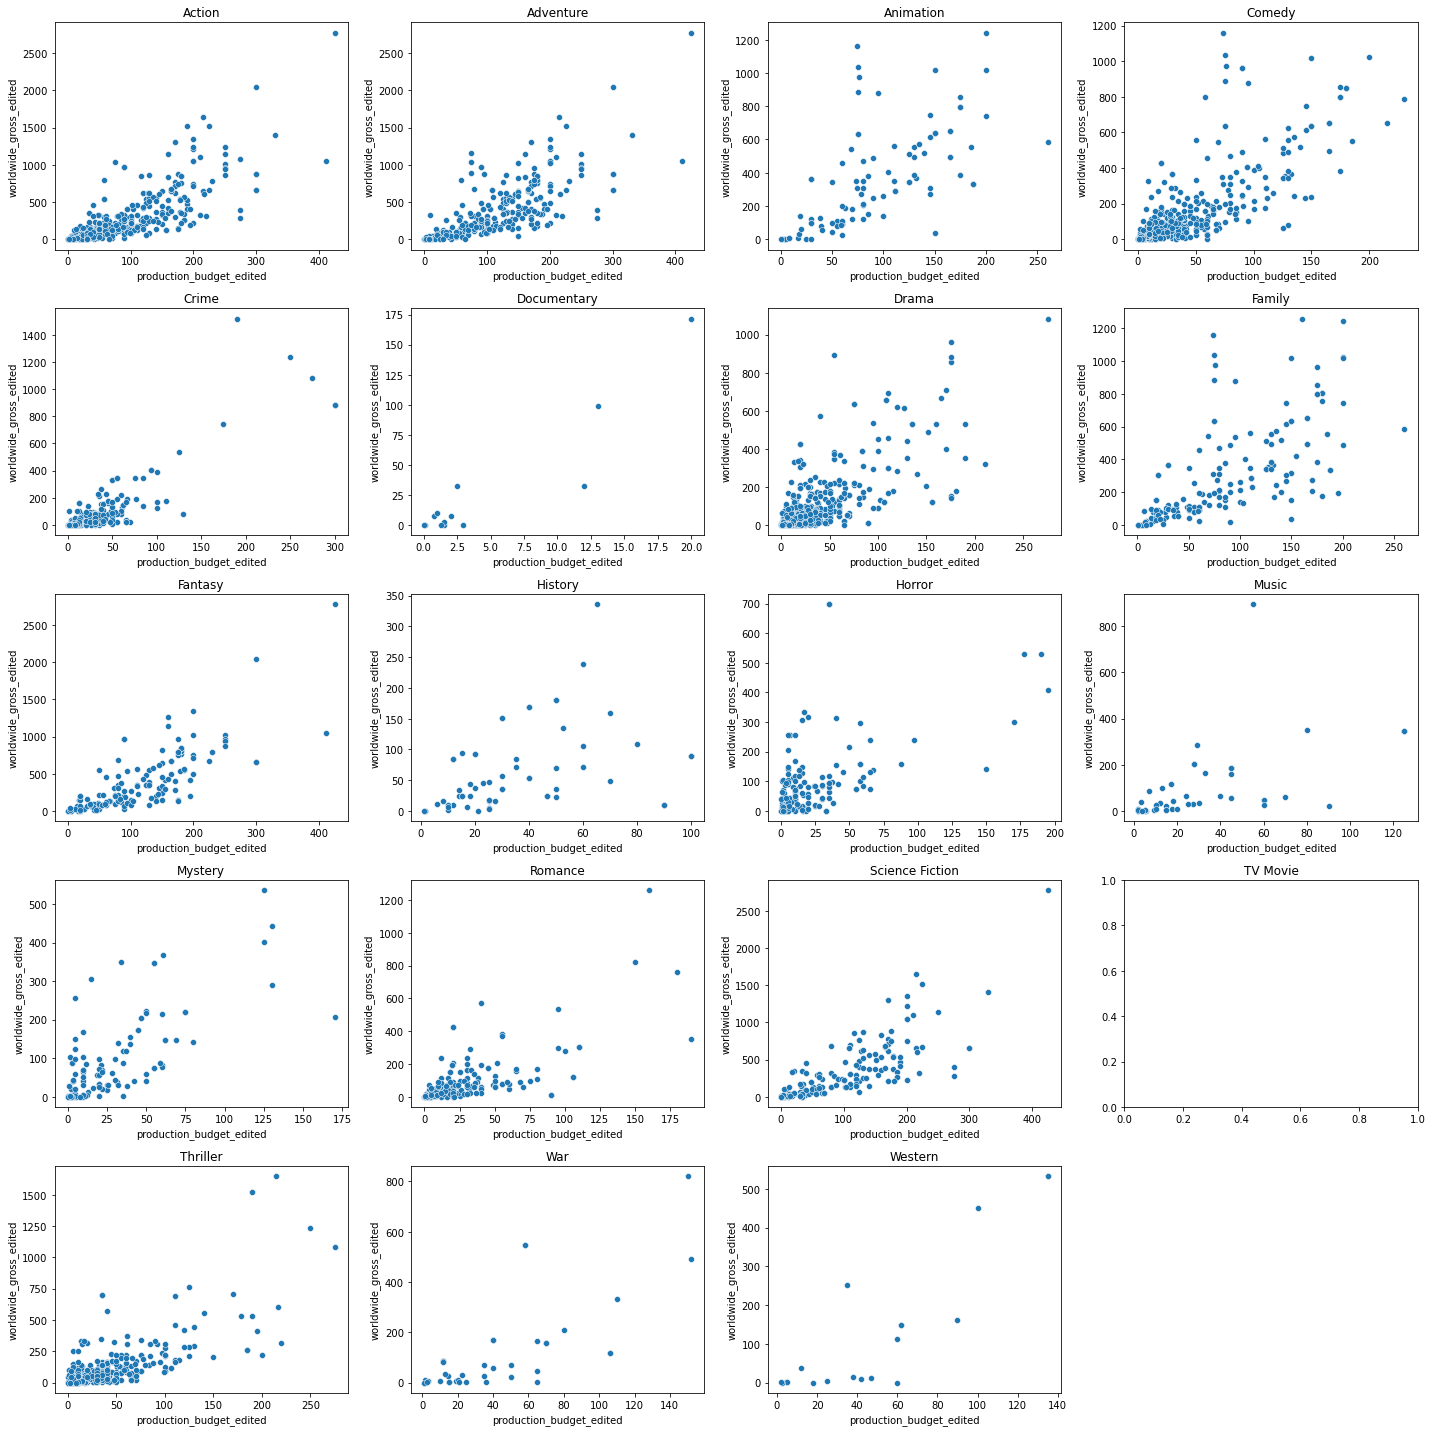

In [163]:
col_nums = 4
row_nums = 5
plt.figure(figsize=(20, 20))
for i, (key, v) in enumerate(genre_df_dictionary.items(), 1):
    plt.subplot(row_nums, col_nums, i)
    p = sns.scatterplot(data=v, x='production_budget_edited', y='worldwide_gross_edited')
    plt.title(key)

plt.tight_layout()

In [182]:
# for key in genre_df_dictionary.keys():
#     print(key, genre_df_dictionary[key].corr())
   

genre_df_dictionary['Action'].corr()


    
# corr_dict_by_genre = {}
# for key, value in genre_df_dictionary.items():
#     corr_dict_by_genre[key] = genre_df_dictionary[key].corr

,popularity,vote_average,vote_count,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
popularity,1.000000,0.512690,0.687165,0.592570,0.601142,0.621311,0.334244
vote_average,0.512690,1.000000,0.600956,0.351050,0.507428,0.468447,0.375880
vote_count,0.687165,0.600956,1.000000,0.668568,0.804866,0.791544,0.487971
production_budget_edited,0.592570,0.351050,0.668568,1.000000,0.710527,0.793557,0.175314
domestic_gross_edited,0.601142,0.507428,0.804866,0.710527,1.000000,0.939213,0.545753
worldwide_gross_edited,0.621311,0.468447,0.791544,0.793557,0.939213,1.000000,0.526618
ROI,0.334244,0.375880,0.487971,0.175314,0.545753,0.526618,1.000000
